In [1]:
!pip install -q tensorflow-gpu==2.0.0-alpha0

    100% |████████████████████████████████| 332.1MB 60kB/s 
    100% |████████████████████████████████| 3.0MB 8.6MB/s 
    100% |████████████████████████████████| 419kB 12.6MB/s 
    100% |████████████████████████████████| 61kB 28.2MB/s 


In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import csv
import matplotlib.pyplot as plt
import numpy as np
import os


# The code in this notebook should work identically between TF v1 and v2
import tensorflow as tf
import zipfile

from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, MobileNet

In [3]:
# Download the colors dataset
if not os.path.exists('colors.csv'):
  !curl -O 'https://raw.githubusercontent.com/random-forests/datasets/master/colors.csv'
!head colors.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  323k  100  323k    0     0  1305k      0 --:--:-- --:--:-- --:--:-- 1305k
name,red,green,blue
parakeet,174,182,87
saddle brown,88,52,1
cucumber crush,222,237,215
pool blue,134,194,201
distance,98,110,130
light urple,179,111,246
east side,172,145,206
florida seashells,250,228,199
paris,145,167,189


In [4]:
# Read the data
colors_rgb = []
csv_reader = csv.reader(open('colors.csv'), delimiter=',')
next(csv_reader) # Remove the header
for row in csv_reader:
    name, r, g, b = row[0].lower().strip(), float(row[1]) / 255.0, float(row[2]) / 255.0, float(row[3]) / 255.0
    colors_rgb.append((name, r, g, b))
print(len(colors_rgb), 'colors downloaded')
print('For example', colors_rgb[0])

14157 colors downloaded
For example ('parakeet', 0.6823529411764706, 0.7137254901960784, 0.3411764705882353)


In [0]:
names = [item[0] for item in colors_rgb]

In [0]:
maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = pad_sequences(tokenized, maxlen=maxlen)
padded_names = padded_names.astype('float32')

vocab_size = len(t.word_index) + 1

In [0]:
r = [item[1] for item in colors_rgb]
g = [item[2] for item in colors_rgb]
b = [item[3] for item in colors_rgb]
targets = np.column_stack([r, g, b])

In [29]:
padded_names.shape

(14157, 25)

In [33]:
# Improve me!
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((1, maxlen), input_shape=(maxlen,)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
# it's fine if your model massively overfits to the training
# set for thsi experiment
history = model.fit(padded_names, targets, epochs=10, validation_split=0.1)

Train on 12741 samples, validate on 1416 samples
Epoch 1/10
12741/12741 [==============================] - 2s 133us/sample - loss: 2.1320 - accuracy: 0.5586 - val_loss: 2.0586 - val_accuracy: 0.5975
Epoch 2/10
12741/12741 [==============================] - 1s 111us/sample - loss: 2.0860 - accuracy: 0.6030 - val_loss: 2.0355 - val_accuracy: 0.6003
Epoch 3/10
12741/12741 [==============================] - 1s 111us/sample - loss: 2.0824 - accuracy: 0.6006 - val_loss: 2.0276 - val_accuracy: 0.6003
Epoch 4/10
12741/12741 [==============================] - 1s 109us/sample - loss: 2.0712 - accuracy: 0.6004 - val_loss: 2.0208 - val_accuracy: 0.6003
Epoch 5/10
12741/12741 [==============================] - 1s 108us/sample - loss: 2.0667 - accuracy: 0.6004 - val_loss: 2.0182 - val_accuracy: 0.6003
Epoch 6/10
12741/12741 [==============================] - 1s 111us/sample - loss: 2.0652 - accuracy: 0.6004 - val_loss: 2.0163 - val_accuracy: 0.6003
Epoch 7/10
12741/12741 [===========================

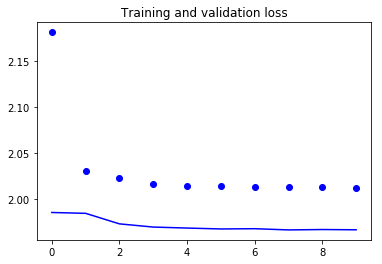

In [24]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [0]:
# plots a color image
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [0]:
def scale(n):
    return int(n * 255)

In [0]:
def predict(name):
    tokenized = t.texts_to_sequences([name])
    padded = pad_sequences(tokenized, maxlen=maxlen)
    padded = padded.astype('float32')
    pred = model.predict(np.array(padded))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

light blue, R,G,B: 94 73 86


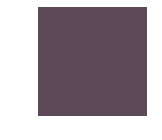

blue, R,G,B: 94 73 86


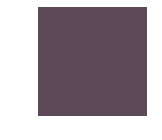

dark blue, R,G,B: 94 73 86


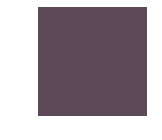

tensorflow orange, R,G,B: 94 73 86


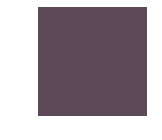

In [26]:
# Hopefully this will improve with your updated model
predict("light blue")
predict("blue")
predict("dark blue")
predict("tensorflow orange")